In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'1.0.11'

## Load in the correction factors and the peak position for each lab

In [2]:

read_peaks =pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Supporting_Info\Supporting_information_Draft1.xlsx',
                          sheet_name='Ne_peak_positions_diffLabs')
read_factors = pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Supporting_Info\Supporting_information_Draft1.xlsx',
                          sheet_name='Ne_corr_factor_diffLabs')

# Split peaks
corr_peaks_UCB = read_peaks[read_peaks['source'] == 'UCB'].reset_index(drop=True)
corr_peaks_EG = read_peaks[read_peaks['source'] == 'EG'].reset_index(drop=True)
corr_peaks_CCMR = read_peaks[read_peaks['source'] == 'CCMR'].reset_index(drop=True)

# Split factors
corr_factor_with_errs_UCB_16Oct22 = read_factors[read_factors['source'] == 'UCB_16Oct22'].reset_index(drop=True)
corr_factor_with_errs_precal = read_factors[read_factors['source'] == 'UCB_precal'].reset_index(drop=True)
corr_factor_with_errs_postcal = read_factors[read_factors['source'] == 'UCB_postcal'].reset_index(drop=True)
corr_factor_with_errs_postcalFeb2025 = read_factors[read_factors['source'] == 'UCB_postcalFeb2025'].reset_index(drop=True)
corr_factor_with_errs_EG = read_factors[read_factors['source'] == 'EG'].reset_index(drop=True)
corr_factor_with_errs_CCMR = read_factors[read_factors['source'] == 'CCMR'].reset_index(drop=True)


In [3]:
split=np.linspace(102.8, 105, 100)

UCB_Dens=pf.calculate_density_ucb(Ne_line_combo='1117_1447', corrected_split=pd.Series(split), 
                                  split_err=0.00001,temp='SupCrit', CI_split=0.67, CI_neon=0.67)
CMASS_Dens=pf.calculate_density_cornell(corrected_split=pd.Series(split), 
                                  split_err=0.00001,temp='SupCrit', CI_split=0.67, CI_neon=0.67)

CMRR_Dens=pf.calculate_density_cornell(lab='CCMR', corrected_split=pd.Series(split), 
                                  split_err=0.00001,temp='SupCrit',CI_split=0.67, CI_neon=0.67)

yes


In [4]:
## Lets do the other Ne lines Berkeley
df_1220_1447_synthetic=pf.calculate_density_ucb(Ne_line_combo='1220_1447', corrected_split=pd.Series(split), split_err=0.00001,temp='SupCrit', CI_split=0, CI_neon=0)
df_1220_1400_synthetic=pf.calculate_density_ucb(Ne_line_combo='1220_1400', corrected_split=pd.Series(split), split_err=0.00001,temp='SupCrit', CI_split=0, CI_neon=0)
df_1117_1400_synthetic=pf.calculate_density_ucb(Ne_line_combo='1117_1400', corrected_split=pd.Series(split), split_err=0.00001,temp='SupCrit', CI_split=0, CI_neon=0)

df_1117_1447_synthetic=pf.calculate_density_ucb(Ne_line_combo='1117_1447', corrected_split=pd.Series(split), split_err=0.00001,temp='SupCrit', CI_split=0, CI_neon=0)


## Make the nice plot for the paper

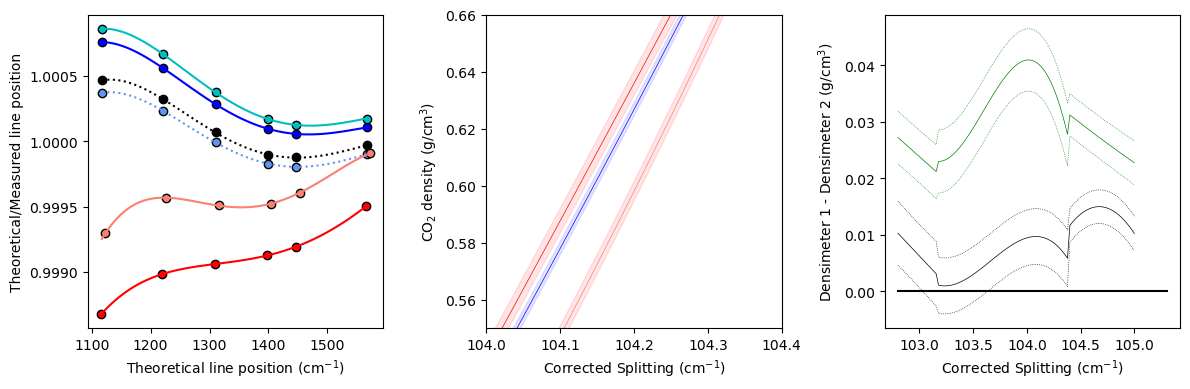

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Start figure
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(12, 4))

# Define your datasets and their plotting styles
datasets = [
    ("UCB", corr_peaks_UCB, corr_factor_with_errs_UCB_16Oct22, 'b', '-', 'EPS (UCB) Oct22'),
    ("UCB", corr_peaks_UCB, corr_factor_with_errs_precal, 'c', '-', 'EPS (UCB) April24'),
    ("UCB", corr_peaks_UCB, corr_factor_with_errs_postcal, 'cornflowerblue', ':', 'EPS (UCB) June24'),
    ("UCB", corr_peaks_UCB, corr_factor_with_errs_postcalFeb2025, 'black', ':', 'EPS (UCB) Feb25'),
    ("EG", corr_peaks_EG, corr_factor_with_errs_EG, 'red', '-', 'CMASS (Cornell)'),
    ("CCMR", corr_peaks_CCMR, corr_factor_with_errs_CCMR, 'salmon', '-', 'CCMR (Cornell)'),
]

# Loop through and plot each fit
for label, peak_df, factor_df, color, linestyle, legend_label in datasets:
    x = np.array(peak_df.iloc[0, 1:7].values, dtype=float)
    y = np.array(factor_df.iloc[0, 1:7].values, dtype=float)
    Pf = np.poly1d(np.polyfit(x, y, 4))
    Px = np.linspace(1117, 1567, 100)
    Py = Pf(Px)

    ax1.plot(x, y, 'ok', mfc=color, label=legend_label)
    ax1.plot(Px, Py, linestyle, color=color)


ax1.set_xlabel('Theoretical line position (cm$^{-1}$)')

ax1.set_ylabel('Theoretical/Measured line position')
#ax2.plot(split, df_1220_1400_synthetic['Density g/cm3'], '-c', lw=0.5)
ax2.fill_between(split, 
                 UCB_Dens['Density g/cm3'] + UCB_Dens['σ Density g/cm3 (from densimeter)'], 
                 UCB_Dens['Density g/cm3'] - UCB_Dens['σ Density g/cm3 (from densimeter)'], 
                 color='b', alpha=0.1)
ax2.plot(split, UCB_Dens['Density g/cm3'], '-b', lw=0.5)
ax2.fill_between(split, 
                 CMASS_Dens['Density g/cm3'] + CMASS_Dens['σ Density g/cm3 (from densimeter)'], 
                 CMASS_Dens['Density g/cm3'] - CMASS_Dens['σ Density g/cm3 (from densimeter)'], 
                 color='red', alpha=0.1)

ax2.plot(split, CMASS_Dens['Density g/cm3'], '-r', lw=0.5)

ax2.fill_between(split, 
                 CMRR_Dens['Density g/cm3'] + CMRR_Dens['σ Density g/cm3 (from densimeter)'], 
                 CMRR_Dens['Density g/cm3'] - CMRR_Dens['σ Density g/cm3 (from densimeter)'], 
                 color='red', alpha=0.1)
ax2.plot(split, CMRR_Dens['Density g/cm3'], '-', color='salmon', lw=0.5)
# ax2.set_xlim([102.7, 103.5])
# ax2.set_ylim([0, 0.3])

denszero=(CMASS_Dens['Density g/cm3']>0)&(UCB_Dens['Density g/cm3']>0)&(CMRR_Dens['Density g/cm3']>0)
ax3.plot(split[denszero], CMASS_Dens['Density g/cm3'].loc[denszero]-UCB_Dens['Density g/cm3'].loc[denszero], '-k', lw=0.5)
#ax2.plot(split, CMASS_Dens['Density g/cm3'], '-r', lw=0.5)
ax3.plot(split[denszero], CMASS_Dens['Density g/cm3'].loc[denszero]-CMRR_Dens['Density g/cm3'].loc[denszero], '-', color='green', lw=0.5)
ax2.set_xlim([104.0, 104.4])
ax2.set_ylim([0.55, 0.66])
Diff=0.0012*(1341-1325)
x=104.148
#ax2.plot([x, x+Diff], [0.6, 0.6], '-k')


Err_dens_CB=((CMASS_Dens['σ Density g/cm3 (from densimeter)'])**2+(UCB_Dens['σ Density g/cm3 (from densimeter)'])**2)**0.5
Err_dens_CC=((CMASS_Dens['σ Density g/cm3 (from densimeter)'])**2+(CMRR_Dens['σ Density g/cm3 (from densimeter)'])**2)**0.5

ax3.plot(split[denszero], (CMASS_Dens['Density g/cm3'].loc[denszero]-UCB_Dens['Density g/cm3'].loc[denszero]).values+Err_dens_CB.loc[denszero].values, ':k', lw=0.5)
ax3.plot(split[denszero], (CMASS_Dens['Density g/cm3'].loc[denszero]-UCB_Dens['Density g/cm3'].loc[denszero]).values-Err_dens_CB.loc[denszero].values, ':k', lw=0.5)


ax3.plot(split[denszero], (CMASS_Dens['Density g/cm3'].loc[denszero]-CMRR_Dens['Density g/cm3'].loc[denszero]).values+Err_dens_CC.loc[denszero].values, ':g', lw=0.5)
ax3.plot(split[denszero], (CMASS_Dens['Density g/cm3'].loc[denszero]-CMRR_Dens['Density g/cm3'].loc[denszero]).values-Err_dens_CC.loc[denszero].values, ':g', lw=0.5)
ax3.plot([102.8, 105.3], [0, 0], '-k')
ax3.set_ylabel('Densimeter 1 - Densimeter 2 (g/cm$^3$)')
ax3.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax2.set_ylabel('CO$_2$ density (g/cm$^3$)')

#ax1.legend()
fig.tight_layout()
fig.savefig('Densimeter_Differences.png', dpi=200)